## The Titanic was a British passenger liner that tragically sank on its maiden voyage in April 1912 after colliding with an iceberg. The sinking of the Titanic resulted in the loss of more than 1,500 lives. You have a Dataset of 891 passengers' information that contains passenger_id, age, Gender, Name, and whether it survived or not. Now you must build a model that answers the question: “What sorts of people were more likely to survive? 

# Roadmap
#### 1. Import All required Libraries
#### 2. Gathering Data




# 1. Gathering Data
#### This dataset was downloaded from Kaggle(https://www.kaggle.com/datasets/yasserh/titanic-dataset). It contains information about 891 passengers who were on board the Titanic. The dataset includes 12 columns of information, namely:
#### - PassengerId: A unique identifier assigned to each passenger. Integer variable.
#### - Survived: A binary variable indicating whether the passenger survived (1) or did not survive (0).
#### - Pclass: The class in which the passenger was travelling - 1st, 2nd or 3rd.  integer variable
#### - Name: The name of the passenger. string variable
#### - Sex: The gender of the passenger- male or female. String variable
#### - Age: The age of the passenger.float variable
#### - SibSp: The number of siblings or spouses the passenger had on board the Titanic.integer variable
#### - Parch: The number of parents or children the passenger had on board the Titanic.integer variable
#### - Ticket: The ticket number.object variable
#### - Fare: The cost of the ticket.float variable
#### - Cabin: The cabin number where the passenger stayed.object variable
#### - Embarked: The port from which the passenger boarded the Titanic, with the following codes: C = Cherbourg, Q = Queenstown, S = Southampton.string variable

###  Import All  Required Libraries

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xlrd
import warnings
warnings.filterwarnings('ignore')

#### This is a dataset stored in a CSV (Comma-Separated Values) file format. CSV files are plain text files commonly used for storing tabular data. Similar to other text files, this CSV file follows a specific format, with columns for PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked. For each row, values are separated by commas. Here's an example of the first three rows of data:
###### PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
###### 1, 0, 3, Braund, Mr. Owen Harris, male, 22.0, 1, 0, A/5 21171, 7.2500, NaN, S
###### 2, 1, 1, Cumings, Mrs. John Bradley (Florence Briggs Thayer), female, 38.0, 1, 0, PC 17599, 71.2833, C85, C
###### 3, 1, 3, Heikkinen, Miss. Laina, female, 26.0, 0, 0, STON/O2. 3101282, 7.9250, NaN, S

In [2]:
titanic=pd.read_csv ('/media/polashi/Study/Codsoft intrenship/TITANIC SURVIVAL PREDICTION/Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data Pre-processing:

In [3]:
#findout missing value

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### There are a considerable number of missing values in the columns for cabin and age.

In [4]:
# droping the cabin column, Name, and Ticket from the data frame because the majority of values are missing and unnecessary information

titanic=titanic.drop(columns='Cabin',axis=1)
titanic=titanic.drop(columns='Name',axis=1)
titanic=titanic.drop(columns='Ticket',axis=1)

In [5]:
# Verifying the missing values 

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [6]:
# converting categorical columns into numarical columns 

titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [7]:
#fill in the missing values

updated_titanic = titanic
updated_titanic['Age']=updated_titanic['Age'].fillna(updated_titanic['Age'].mean())
updated_titanic['Embarked']=updated_titanic['Embarked'].fillna(updated_titanic['Embarked'].mean())

updated_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


###### fillna is a powerful tool for handling missing data, providing flexibility in choosing the most suitable strategy based on the characteristics of the dataset and the goals of the analysis.By using the `fillna` tool to replace all missing values, you have taken a crucial step towards ensuring that your data is complete and accurate. This is essential for any successful data analysis or modeling, as missing data can lead to inaccurate results and flawed insight.

In [8]:
# Verifying the missing values 

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Visualization Data WIth Autoviz

In [9]:
#Using FIXDQ for data quality issues

from autoviz import FixDQ
fixdq = FixDQ()

Imported v0.1.804. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Shape of your Data Set loaded: (891, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns (max) in each category:
    Numeric Columns : ['Age', 'Fare', 'Embarked']
    Integer-Categorical Columns: ['Pclass', 'SibSp', 'Parch']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['Sex']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['PassengerId']
    Columns that will not be considered in modeling: []
    8 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['PassengerId']

################ Binary_Cl

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

Total Number of Scatter Plots = 6
All Plots are saved in ./AutoViz_Plots/Survived
Time to run AutoViz = 3 seconds 


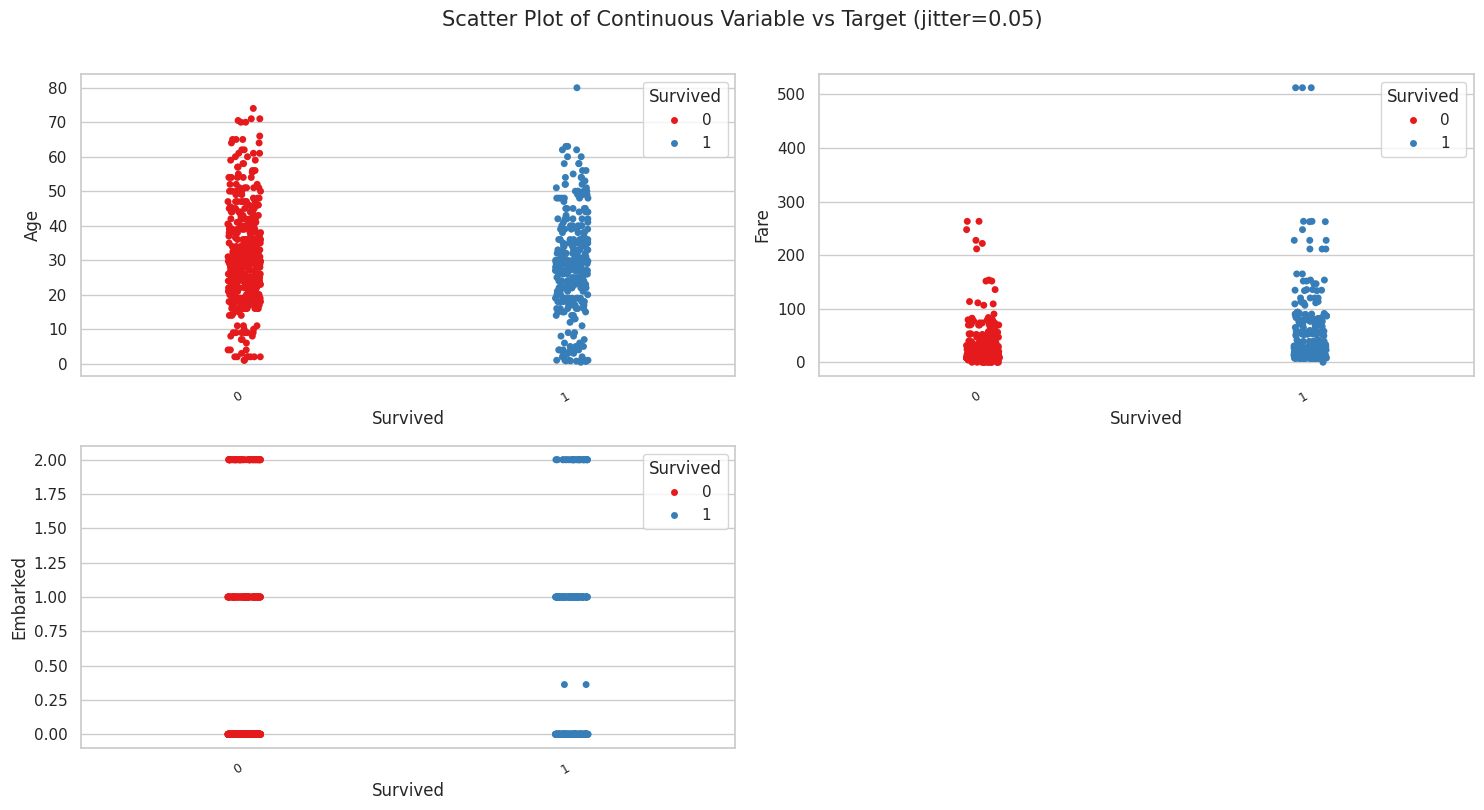

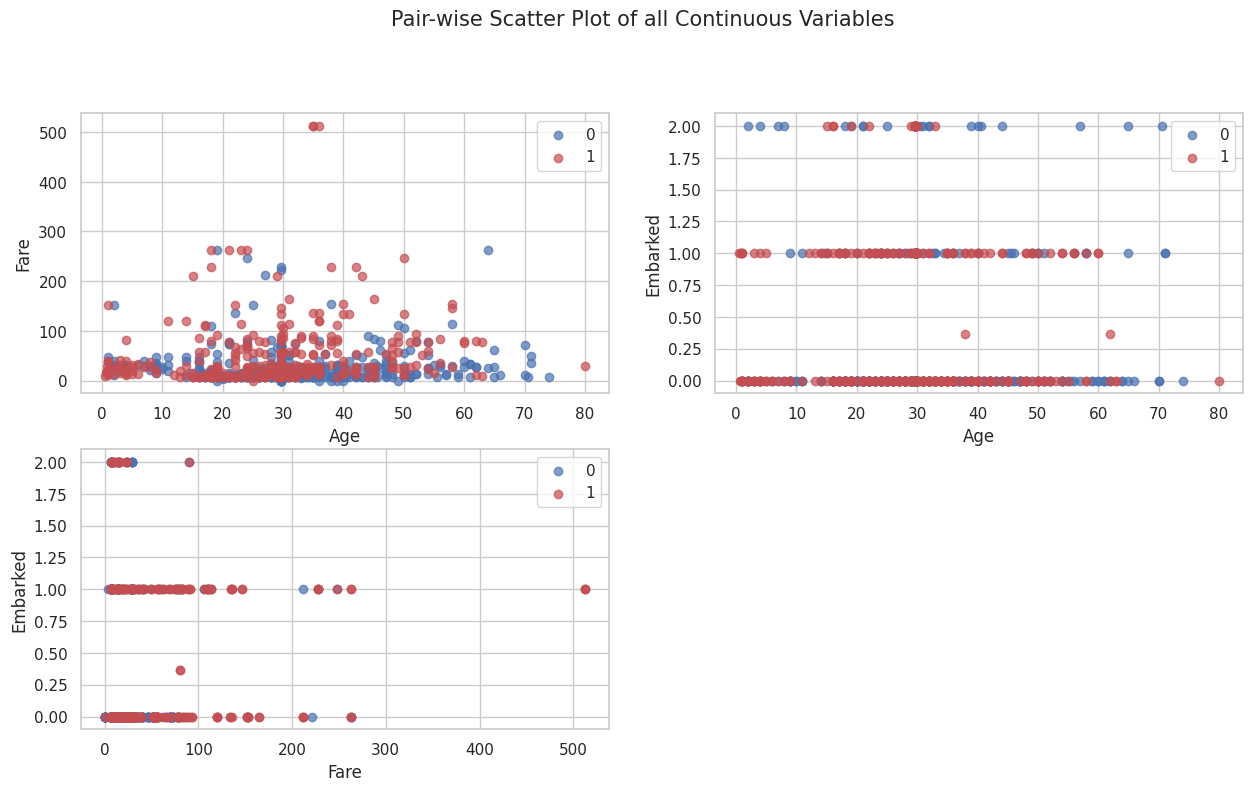

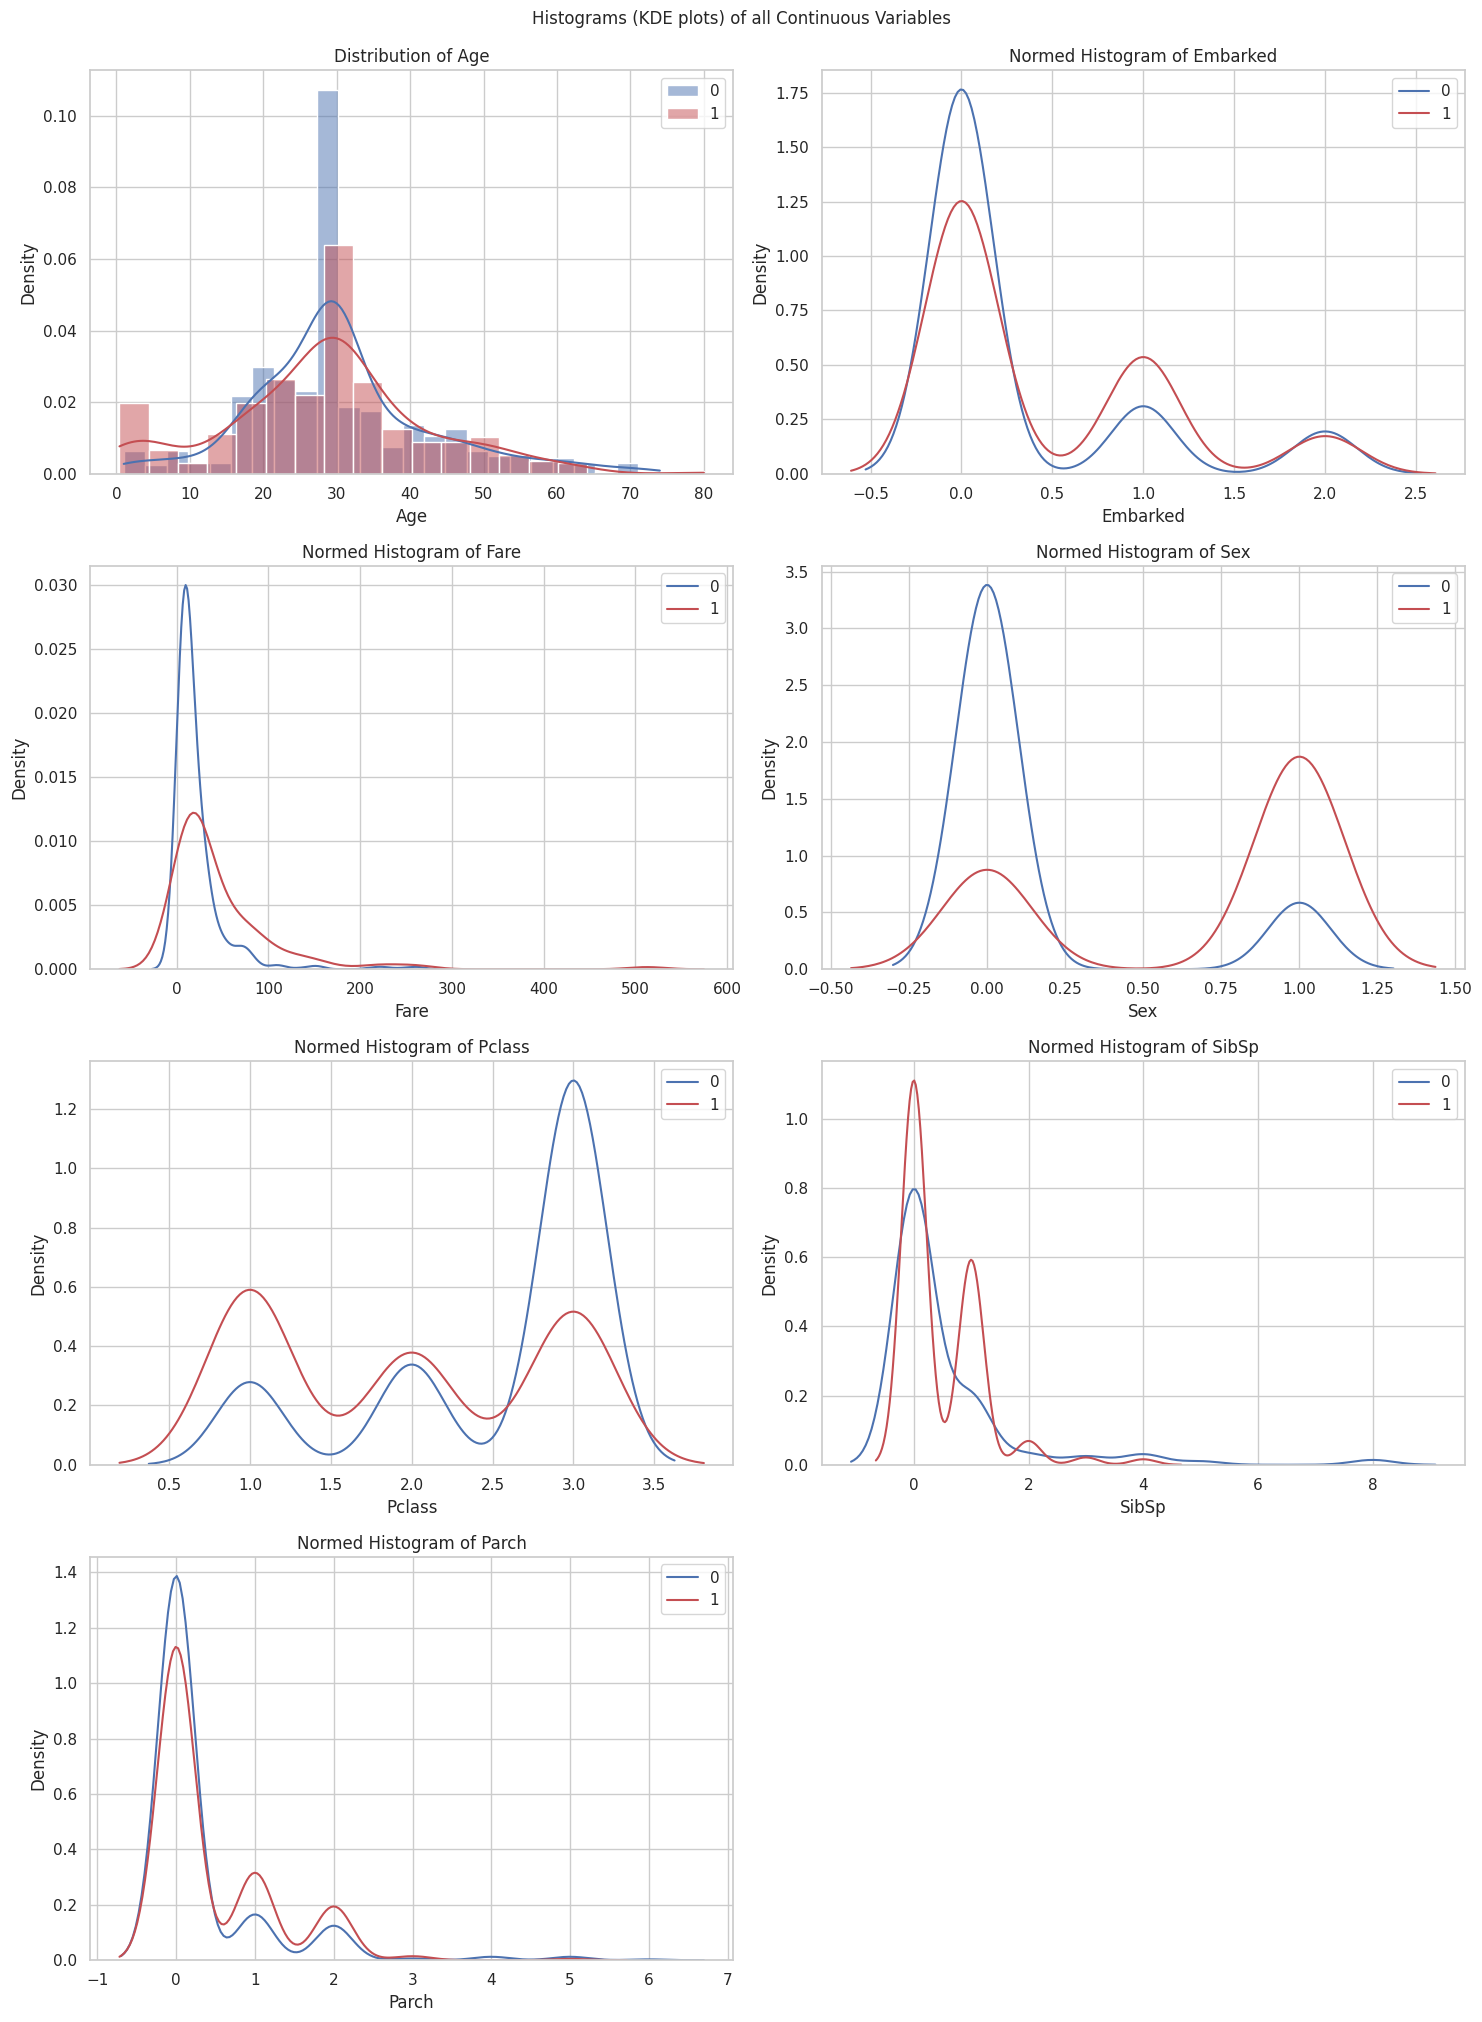

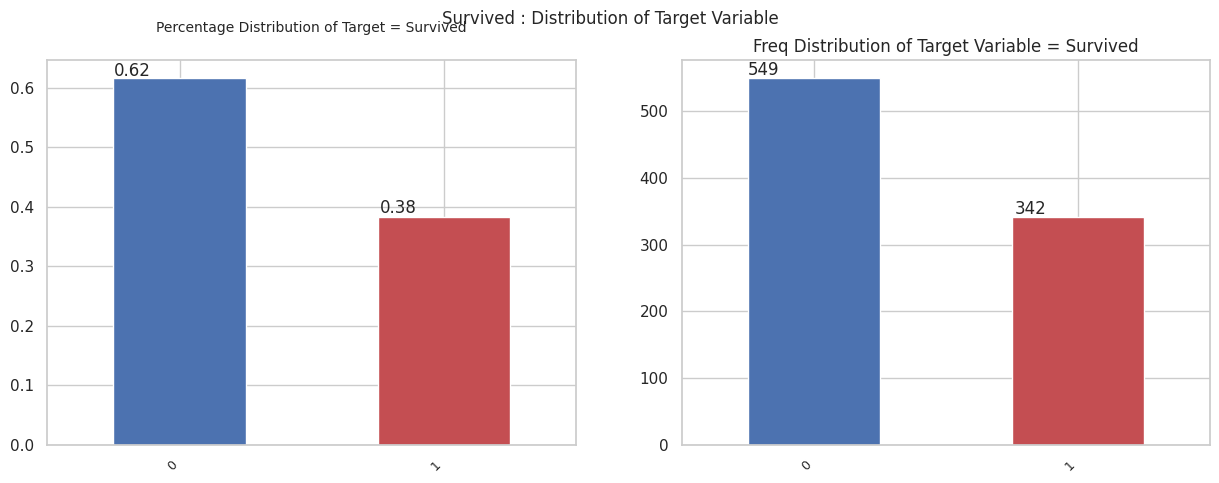

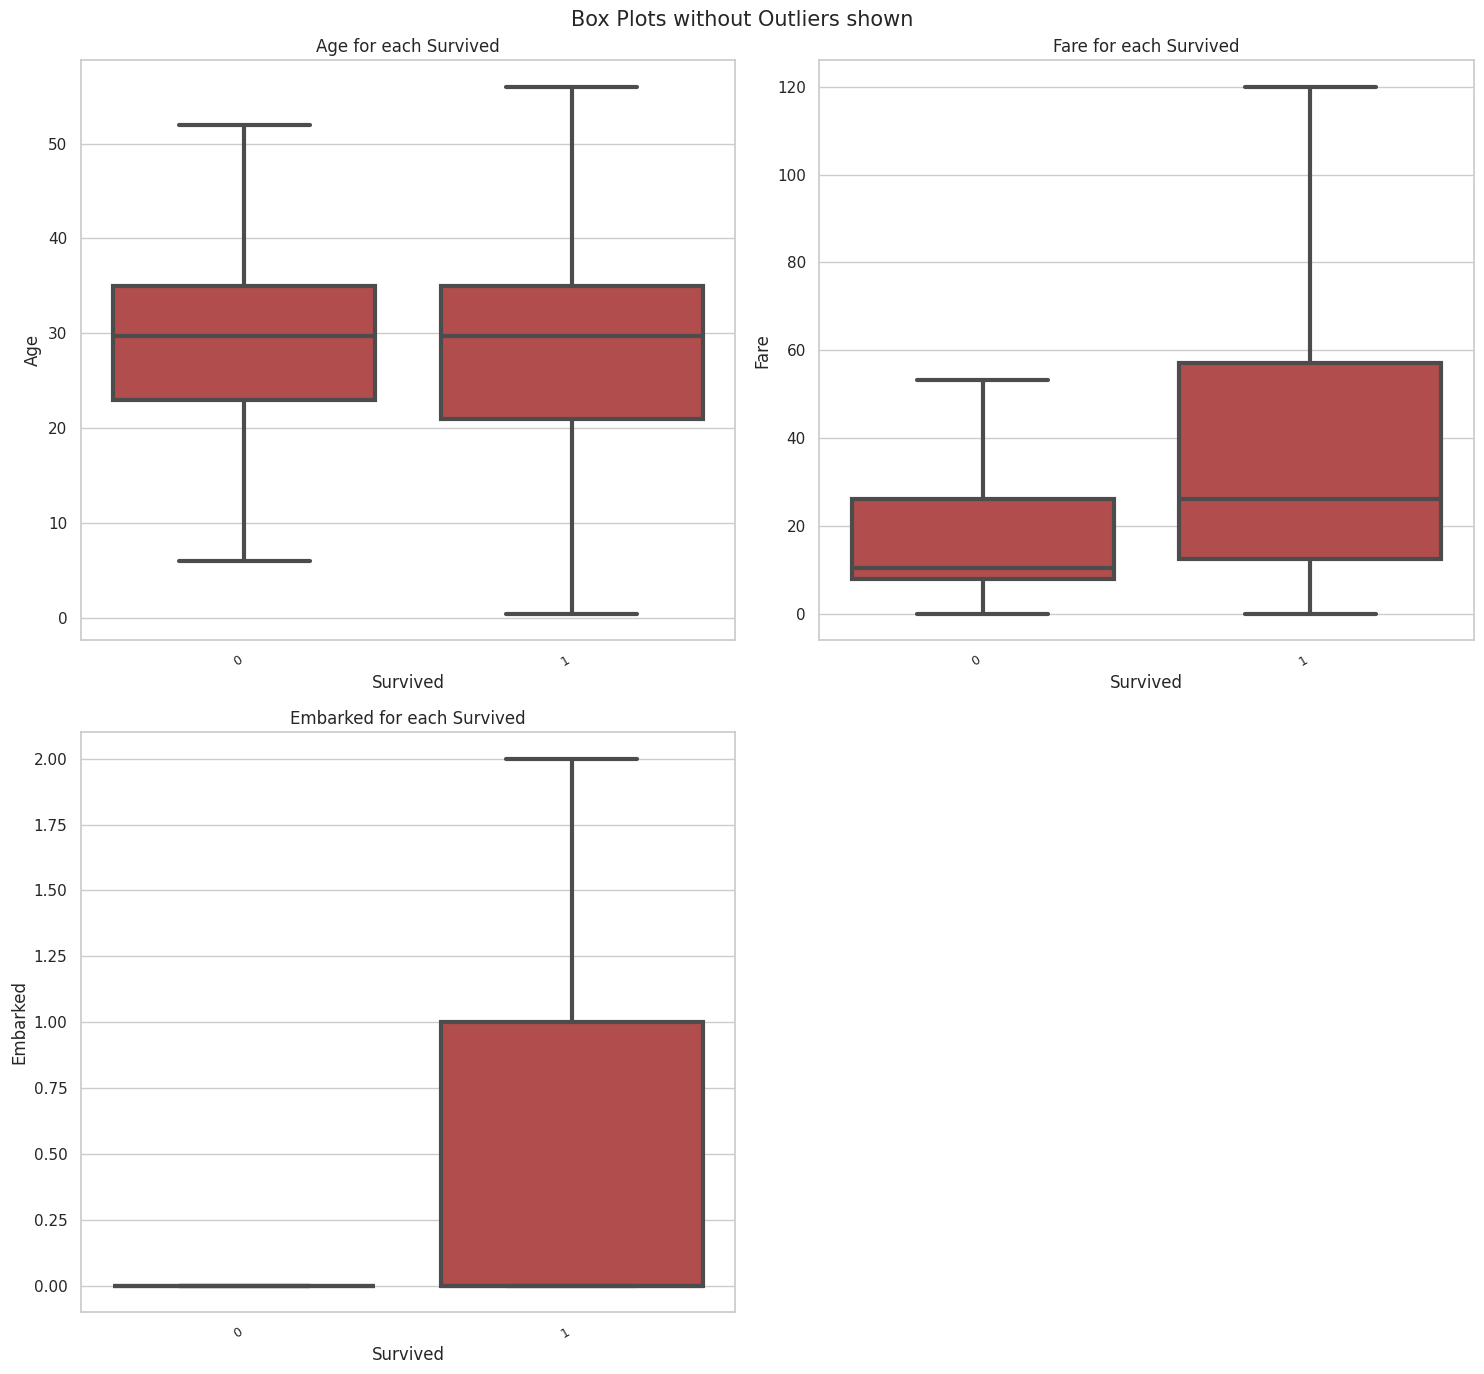

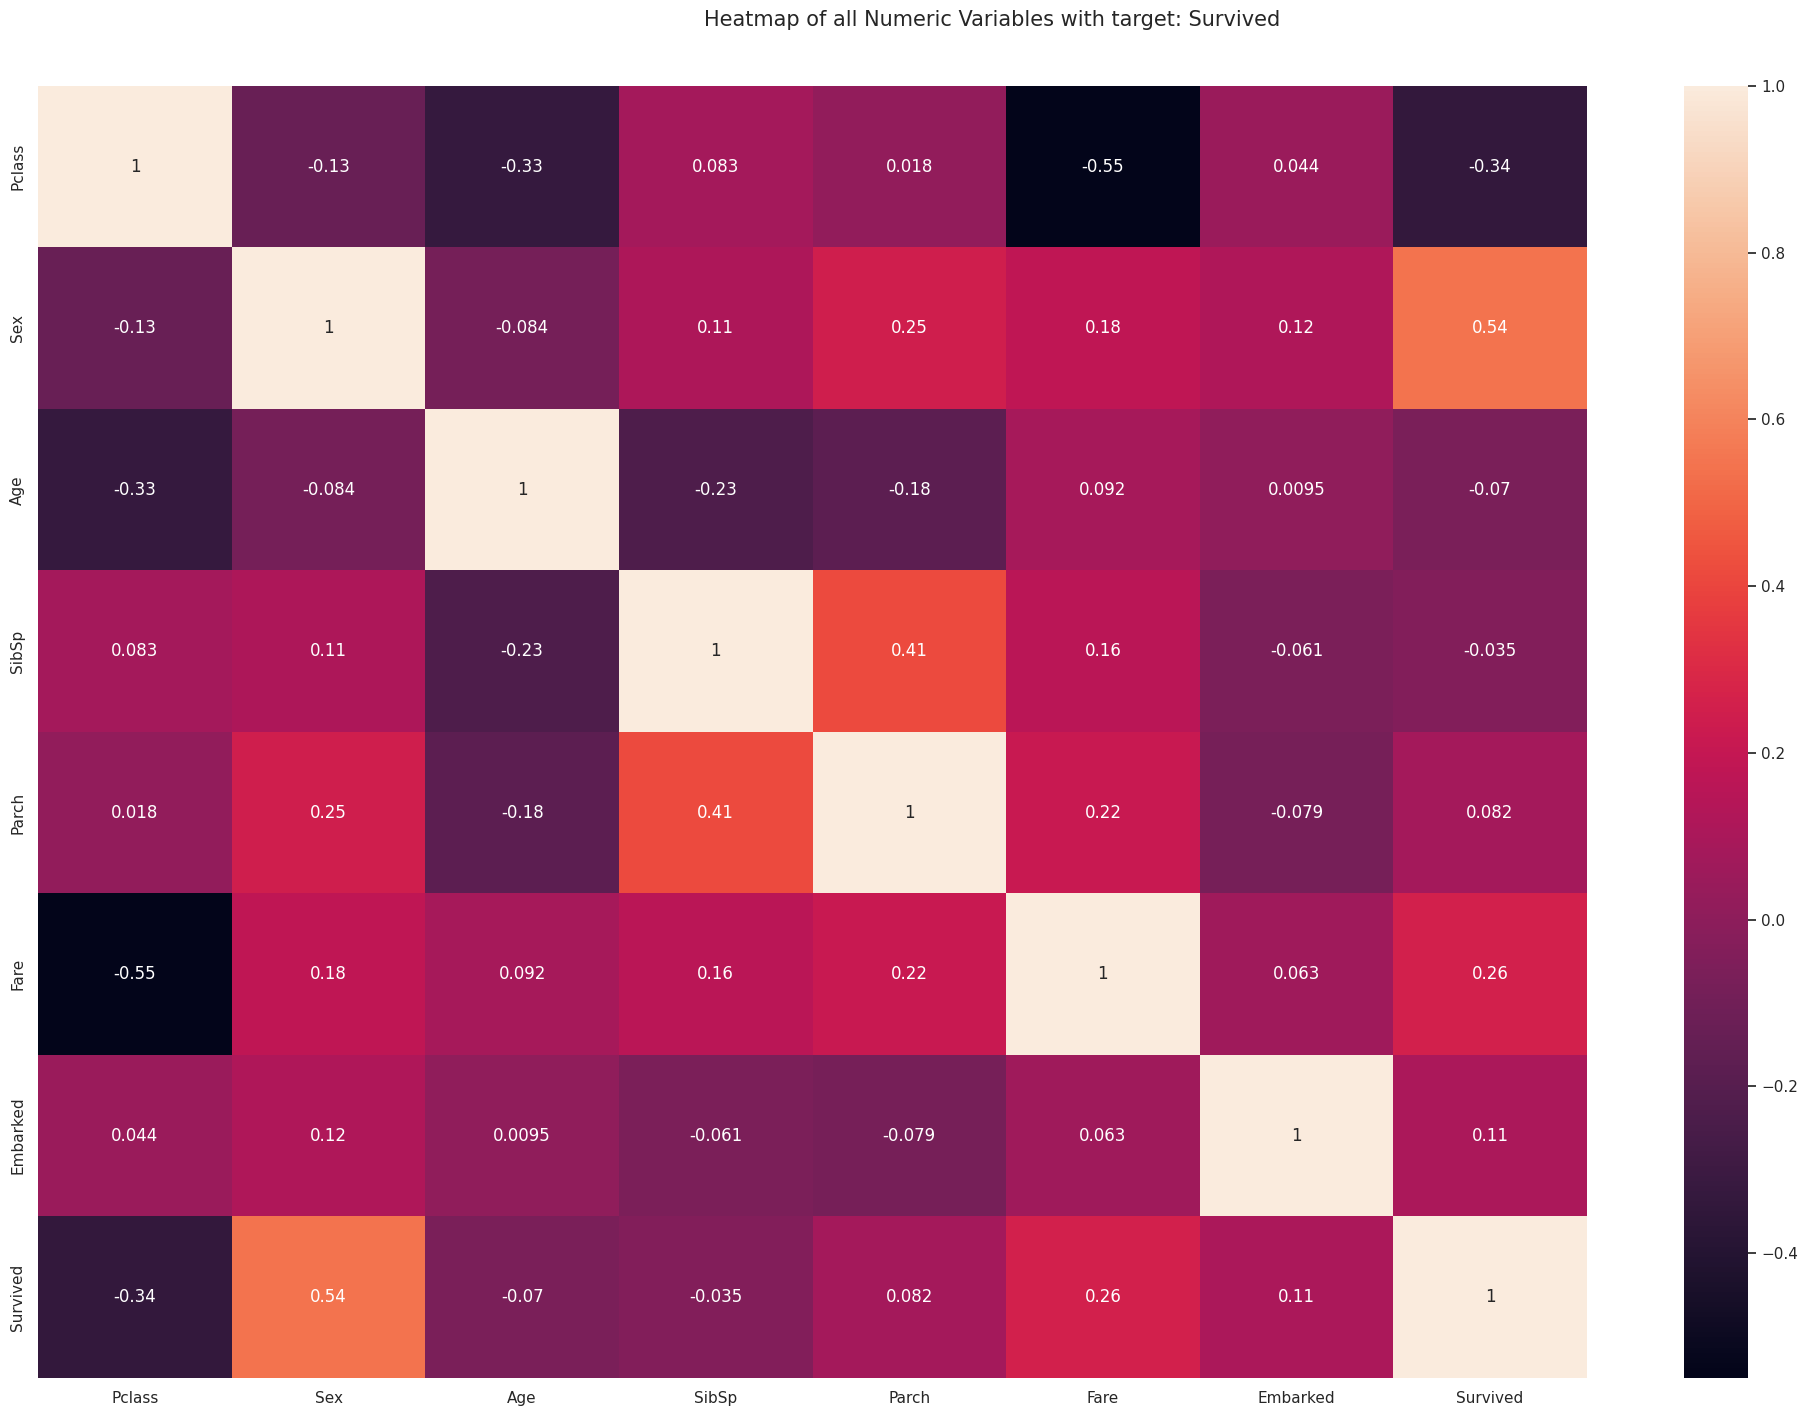

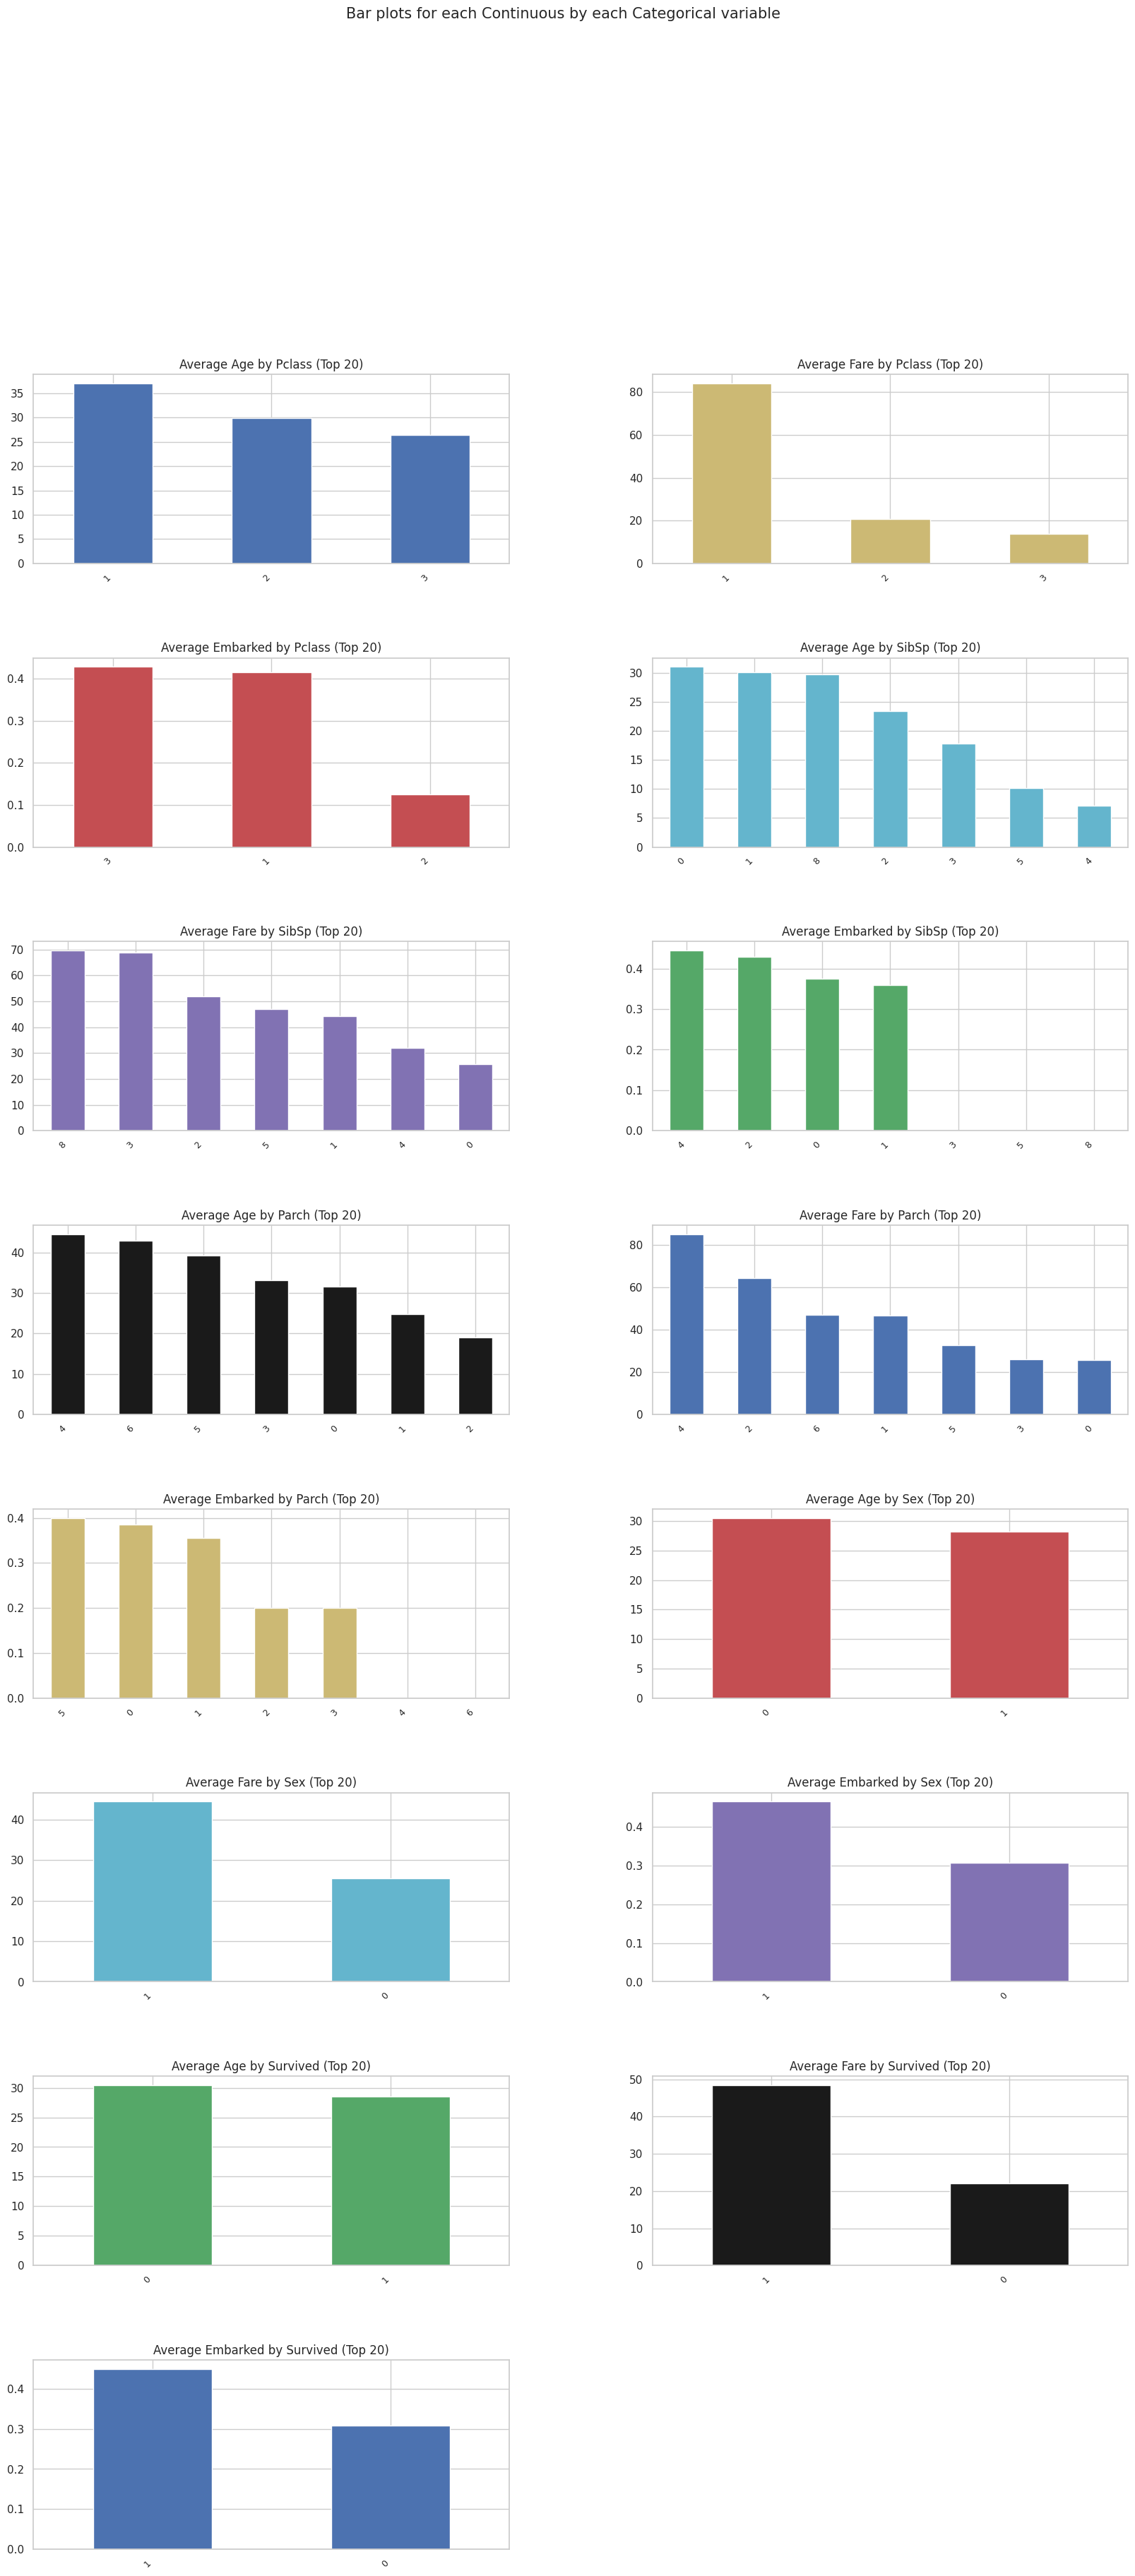

In [10]:
#visualize data in autoviz

from autoviz.AutoViz_Class import AutoViz_Class
from autoviz import FixDQ
%matplotlib inline



AV = AutoViz_Class()
target = 'Survived'

filename = titanic


dft = AV.AutoViz(
    "",
    sep=",",
    depVar= target,
    dfte=titanic,
    header=0,
    verbose=2,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=15000,
    max_cols_analyzed=30,
    save_plot_dir=None
)

In [13]:
# Finding the number of people who survived and did not survive 

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
 #splite the dataset

X=titanic.drop(columns=['PassengerId','Survived'], axis=1)
Y=titanic['Survived']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [16]:
#using standardScaler to standardize

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LogisticRegression

##### Logistic regression is a popular statistical method used to examine the relationship between a dependent variable and one or more independent variables. In many cases, it is used to predict a binary outcome, such as 'yes/no' or 'pass/fail'. The Titanic dataset is one such example, where the goal is to predict whether a passenger survived or not.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression()
clf.fit(X_train_scaled,Y_train)

LogisticRegression()

In [19]:
# calculate accuracy

y_pred=clf.predict(X_test_scaled)
ac_1=accuracy_score(Y_test,y_pred)
print(ac_1)

0.7821229050279329


In [20]:
from sklearn.metrics import f1_score

y_pred_class = y_pred 
f1_score(Y_test, y_pred_class)

0.7153284671532847

###### It seems like the accuracy result is not satisfactory. In order to improve our results, we may need to consider trying out different classification algorithms.

[[91  9]
 [30 49]]


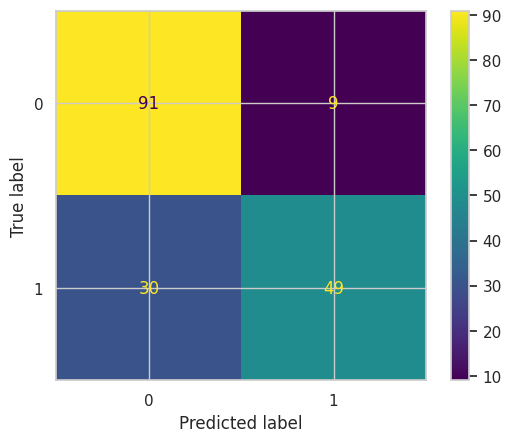

In [21]:
#Displaying Confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)
print(confusion_matrix(Y_test,y_pred))


# DecisionTreeClassifier
#### The primary objective of utilizing a Decision Tree involves the creation of a training model that can effectively predict the class or value of the target variable through learning. Specifically, in this context, our target variable is 'survived'. It is hoped that this algorithm will yield superior outcomes, thereby contributing to the advancement of our research in this area.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [24]:
#Calculate Accuracy

y_pred1=clf1.predict(X_test_scaled)
ac_2 = accuracy_score(Y_test,y_pred1)
print(ac_2)

0.770949720670391


##### The current classification algorithm has shown improved accuracy in comparison to logistic regression. However, it appears that the results are still below the expected standard. Hence, it is recommended to explore an alternate classification algorithm to obtain more accurate results.

[[81 19]
 [22 57]]


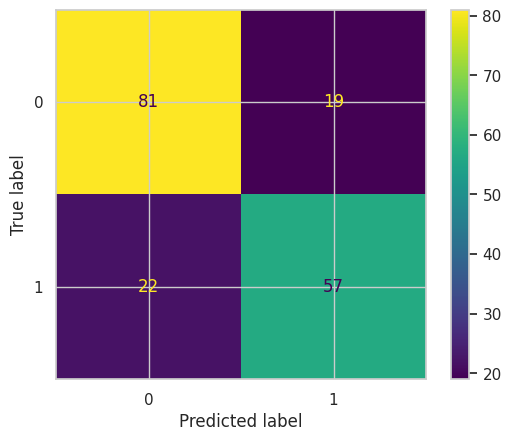

In [25]:
#Displaying confusion_Matrix

ConfusionMatrixDisplay.from_predictions(Y_test,y_pred1)
print(confusion_matrix(Y_test,y_pred1))

# RandomForestClassifier
#### The Random Forest learning algorithm is a powerful tool for classification tasks. This algorithm is capable of supporting both binary and multiclass labels, and can accommodate both continuous and categorical features. Its versatility makes it a valuable asset for a wide range of applications, including those in business and academia. By leveraging its capabilities, users can effectively analyze complex data sets and extract valuable insights. Overall, the Random Forest learning algorithm is a valuable tool that is well-suited for use in a variety of professional and research contexts.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf2 = RandomForestClassifier()
clf2.fit(X_train_scaled,Y_train)

RandomForestClassifier()

In [28]:
#calculate accuracy

y_pred2=clf2.predict(X_test_scaled)
ac_3 = accuracy_score(Y_test,y_pred2)
print(ac_3)

0.7988826815642458


#### The Random Forest algorithm exhibits a level of accuracy that is significantly adequate in comparison to the other two models.

[[84 16]
 [20 59]]


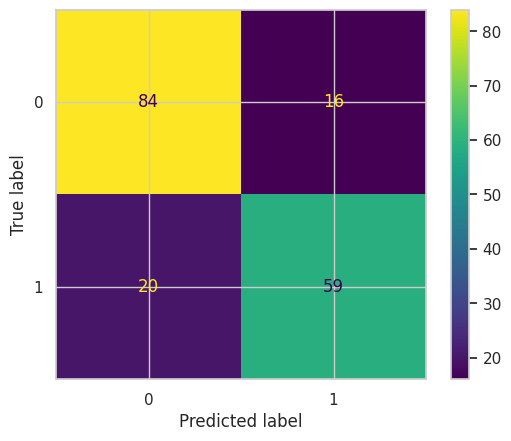

In [29]:
#Displaying Confusion_matrix
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred2 )

print(confusion_matrix(Y_test,y_pred2))

# Comparing Different Models

In [30]:
results=pd.DataFrame({'Model':['LogisticRegression', 'DecisionTreeClassifier',' RandomForestClassifier'],
                    'Accuracy Score':[ac_1,ac_2,ac_3]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
RandomForestClassifier,0.798883
LogisticRegression,0.782123
DecisionTreeClassifier,0.770950


# Conclusion:


## Upon conducting experiments with three distinct models, we have determined that the RandomForestClassifier model outperformed both the logisticRegression and DecisionTreeClassifier models. This project has provided us with a wealth of knowledge, which we will apply to our future studies.